
**Titanic Survival EDA and Prediction Model**


The Titanic Survival Problem is a well-known data science challenge that involves predicting which passengers aboard the Titanic survived the ship's sinking in 1912. The goal of the problem is to build a model that can accurately predict whether a given passenger would have survived based on a number of features, such as their age, gender, and passenger class.

https://www.kaggle.com/c/titanic/data


**LOADING DATA**

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**PREPARING DATA**

In [ ]:
for col in df.select_dtypes(include='number'):
    if df[col].isnull().sum() > 0:
        skew = df[col].skew()
        if abs(skew) < 0.5:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)


<ipython-input-43-3b09552576b4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df=df.drop(['Cabin'],axis=1)

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**VISUALISING**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

SEX

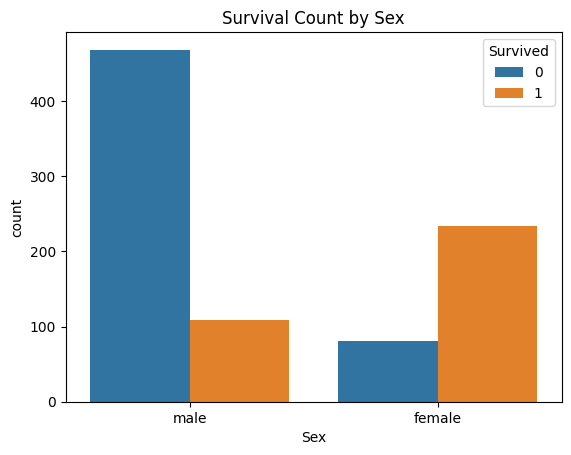

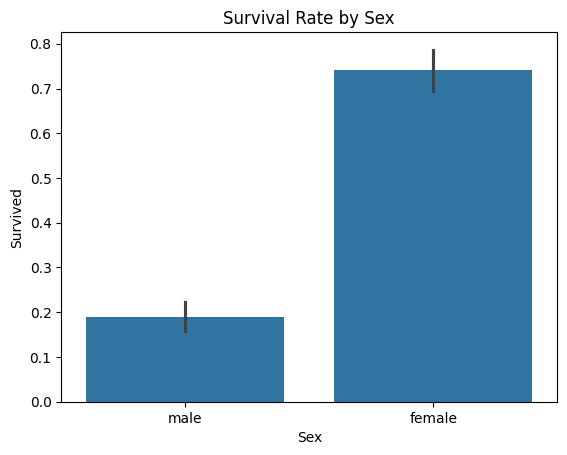

Female survival rate: 74.20%
Male survival rate: 18.89%


In [ ]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival Count by Sex")
plt.show()
sns.barplot(data=df, x='Sex', y='Survived')
plt.title("Survival Rate by Sex")
plt.show()
for _, row in survival_rate.iterrows():
    sex = row['Sex']
    percent = row['Survived']
    print(f"{sex.capitalize()} survival rate: {percent:.2f}%")


Despite men forming a larger portion of the passenger population, their survival rate was significantly lower than that of women and children. This suggests that gender and age played a critical role in survival outcomes, likely due to the prioritization of women and children during lifeboat evacuations.

**AGE**

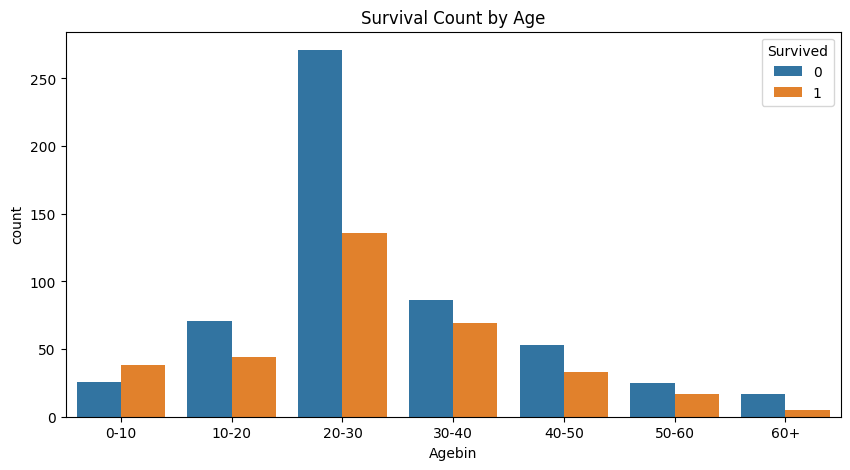

0-10 survival rate: 59.38%
10-20 survival rate: 38.26%
20-30 survival rate: 33.42%
30-40 survival rate: 44.52%
40-50 survival rate: 38.37%
50-60 survival rate: 40.48%
60+ survival rate: 22.73%


<ipython-input-52-80bcc1a12344>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rate = df.groupby('Agebin')['Survived'].mean().reset_index()


In [ ]:
df['Agebin'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 80], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60+'])
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Agebin', hue='Survived')
plt.title("Survival Count by Age")
plt.show()

age_survival_rate = df.groupby('Agebin')['Survived'].mean().reset_index()
age_survival_rate['Survived'] = age_survival_rate['Survived'] * 100


for _, row in age_survival_rate.iterrows():
    agebin = row['Agebin']
    percent = row['Survived']
    print(f"{agebin} survival rate: {percent:.2f}%")


The survival rate was highest among children under 10, suggesting they were given priority during evacuation efforts. In contrast, passengers aged 60 and above had the lowest survival rate, likely due to mobility challenges or lower prioritization during rescues.

**PCLASS**

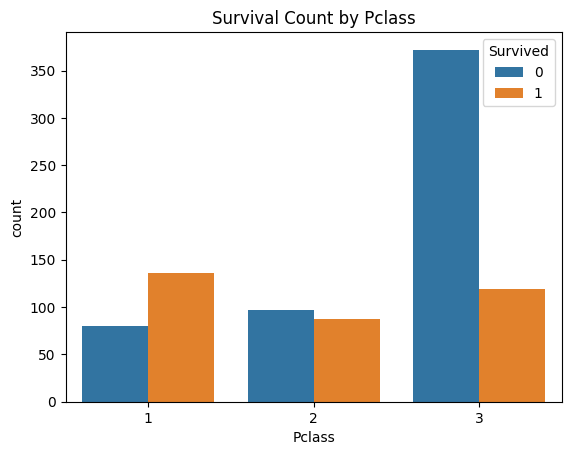

   Pclass   Survived
0       1  62.962963
1       2  47.282609
2       3  24.236253


In [ ]:
sns.countplot(data=df,x='Pclass',hue='Survived')
plt.title("Survival Count by Pclass")
plt.show()
survival_by_pclass = df.groupby('Pclass')['Survived'].mean().reset_index()
survival_by_pclass['Survived'] = survival_by_pclass['Survived'] * 100

print(survival_by_pclass)


Passengers from higher socioeconomic backgrounds (1st class) had significantly higher survival rates. This may be due to better cabin locations, quicker access to lifeboats, and preferential treatment during evacuation. In contrast, 3rd class passengers, often located in the lower decks, faced delayed access and higher fatality rates.

**GENDER AND CLASS**

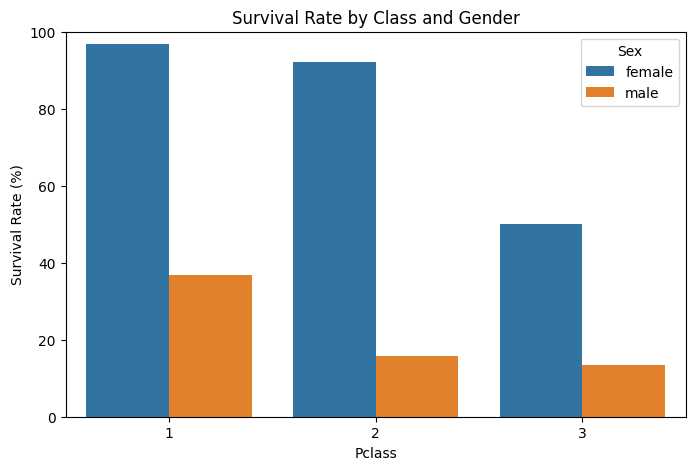

Pclass 1 - Female survival rate: 96.81%
Pclass 1 - Male survival rate: 36.89%
Pclass 2 - Female survival rate: 92.11%
Pclass 2 - Male survival rate: 15.74%
Pclass 3 - Female survival rate: 50.00%
Pclass 3 - Male survival rate: 13.54%


In [ ]:
survival_by_class_gender = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
survival_by_class_gender['Survived'] *= 100
plt.figure(figsize=(8, 5))
sns.barplot(data=survival_by_class_gender, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.show()

for _, row in survival_by_class_gender.iterrows():
    print(f"Pclass {row['Pclass']} - {row['Sex'].capitalize()} survival rate: {row['Survived']:.2f}%")


Gender had a significant effect on survival rates within each passenger class. Female passengers consistently had much higher survival rates than male passengers, regardless of class. This reflects the "women and children first" policy followed during the evacuation. For example, in 1st class, nearly 97% of women survived compared to only 37% of men. The disparity was even more pronounced in 2nd and 3rd class.

**FAMILY**

Alone survival rate: 30.35%
With Family survival rate: 50.56%


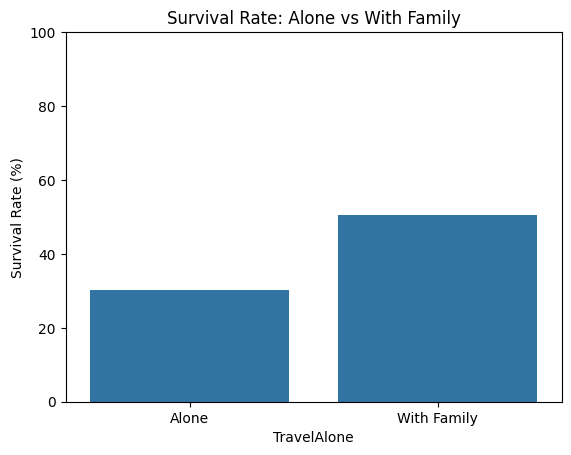

In [ ]:
df['TravelAlone'] = ((df['SibSp'] == 0) & (df['Parch'] == 0)).map({True: 'Alone', False: 'With Family'})


survival_by_travel_type = df.groupby('TravelAlone')['Survived'].mean().reset_index()
survival_by_travel_type['Survived'] *= 100


for _, row in survival_by_travel_type.iterrows():
    print(f"{row['TravelAlone']} survival rate: {row['Survived']:.2f}%")

sns.barplot(data=survival_by_travel_type, x='TravelAlone', y='Survived')
plt.title("Survival Rate: Alone vs With Family")
plt.ylabel("Survival Rate (%)")
plt.ylim(0, 100)
plt.show()

Alone survival rate: 46.64%
sibling survival rate: 34.54%


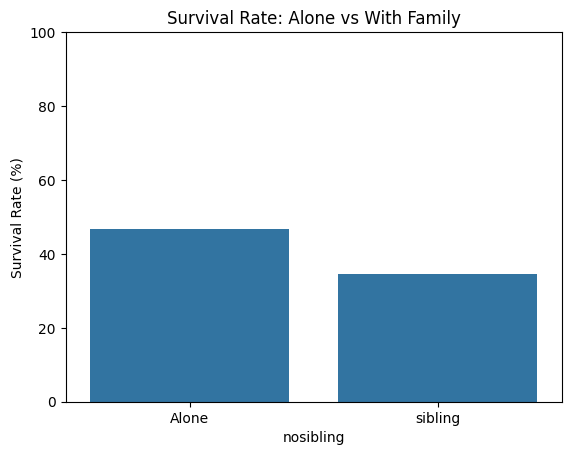

In [ ]:
df['nosibling'] = ((df['SibSp'] != 0) ).map({True: 'Alone', False: 'sibling'})
survival_by_travel_type = df.groupby('nosibling')['Survived'].mean().reset_index()
survival_by_travel_type['Survived'] *= 100


for _, row in survival_by_travel_type.iterrows():
    print(f"{row['nosibling']} survival rate: {row['Survived']:.2f}%")

sns.barplot(data=survival_by_travel_type, x='nosibling', y='Survived')
plt.title("Survival Rate: Alone vs With Family")
plt.ylabel("Survival Rate (%)")
plt.ylim(0, 100)
plt.show()

SibSp = 0.0 → Survival Rate: 34.54%
SibSp = 1.0 → Survival Rate: 53.59%
SibSp = 2.0 → Survival Rate: 46.43%
SibSp = 3.0 → Survival Rate: 25.00%
SibSp = 4.0 → Survival Rate: 16.67%
SibSp = 5.0 → Survival Rate: 0.00%
SibSp = 8.0 → Survival Rate: 0.00%


<ipython-input-58-22a8b2d78992>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sibsp_survival, x='SibSp', y='Survived', palette='crest')


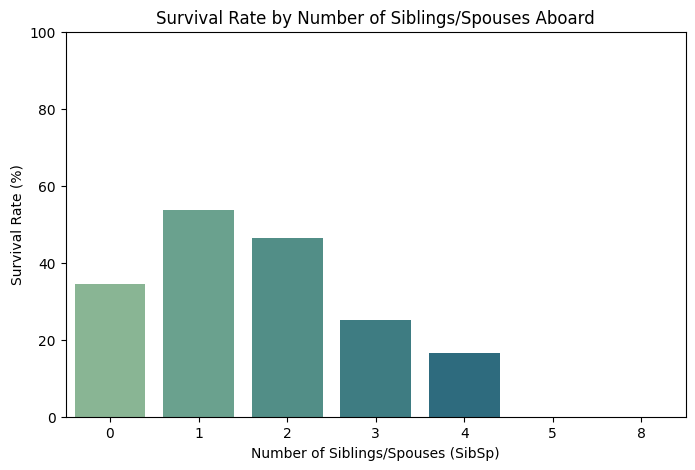

In [ ]:
sibsp_survival = df.groupby('SibSp')['Survived'].mean().reset_index()
sibsp_survival['Survived'] *= 100


for _, row in sibsp_survival.iterrows():
    print(f"SibSp = {row['SibSp']} → Survival Rate: {row['Survived']:.2f}%")

plt.figure(figsize=(8, 5))
sns.barplot(data=sibsp_survival, x='SibSp', y='Survived', palette='crest')
plt.title("Survival Rate by Number of Siblings/Spouses Aboard")
plt.xlabel("Number of Siblings/Spouses (SibSp)")
plt.ylabel("Survival Rate (%)")
plt.ylim(0, 100)
plt.show()


Passengers traveling with a small family group (1–2 companions) had the highest survival rates, likely due to better coordination and support during evacuation. Those traveling alone or in large families (3 or more) had lower survival chances, possibly due to confusion or difficulty evacuating together. This trend suggests that family size played an important role in survival during the Titanic disaster.

**CLASS+GENDER+AGE**

<ipython-input-62-b40f0f4d4e2f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class_gender_age = df.groupby(['Pclass', 'Sex','Agebin'])['Survived'].mean().reset_index()


<Figure size 800x500 with 0 Axes>

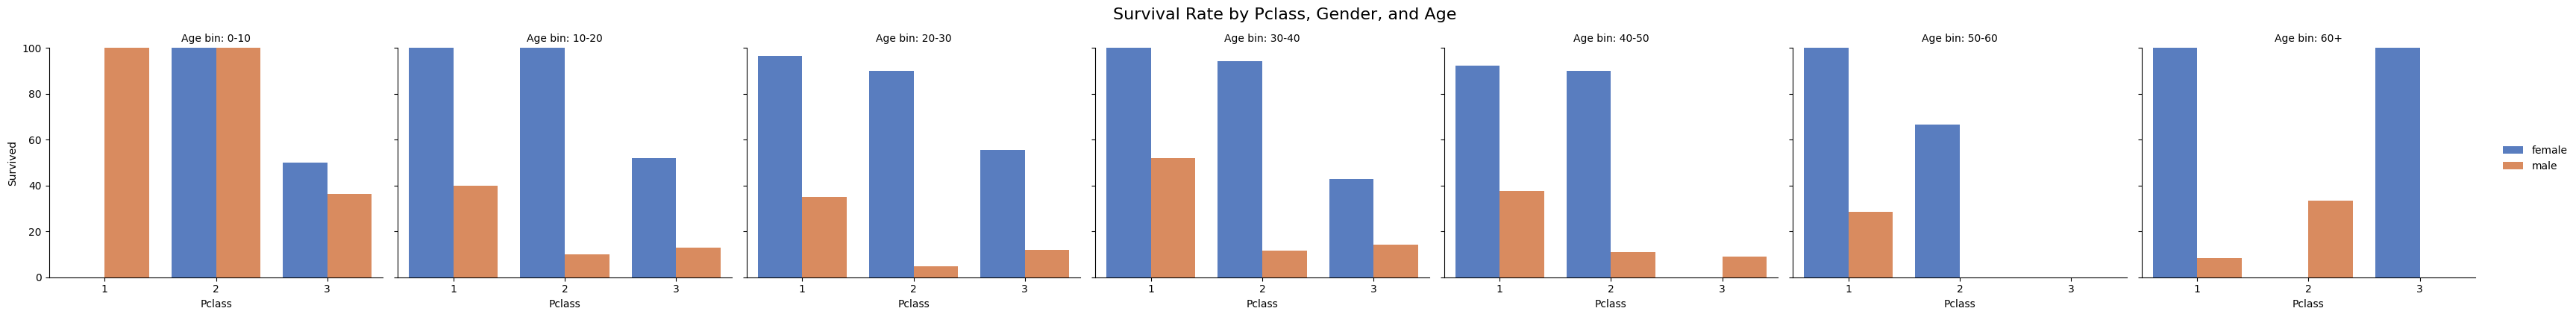

Pclass 1 | Female | Age bin 0-10 → Survival rate: 0.00%
Pclass 1 | Female | Age bin 10-20 → Survival rate: 100.00%
Pclass 1 | Female | Age bin 20-30 → Survival rate: 96.67%
Pclass 1 | Female | Age bin 30-40 → Survival rate: 100.00%
Pclass 1 | Female | Age bin 40-50 → Survival rate: 92.31%
Pclass 1 | Female | Age bin 50-60 → Survival rate: 100.00%
Pclass 1 | Female | Age bin 60+ → Survival rate: 100.00%
Pclass 1 | Male | Age bin 0-10 → Survival rate: 100.00%
Pclass 1 | Male | Age bin 10-20 → Survival rate: 40.00%
Pclass 1 | Male | Age bin 20-30 → Survival rate: 35.00%
Pclass 1 | Male | Age bin 30-40 → Survival rate: 52.00%
Pclass 1 | Male | Age bin 40-50 → Survival rate: 37.50%
Pclass 1 | Male | Age bin 50-60 → Survival rate: 28.57%
Pclass 1 | Male | Age bin 60+ → Survival rate: 8.33%
Pclass 2 | Female | Age bin 0-10 → Survival rate: 100.00%
Pclass 2 | Female | Age bin 10-20 → Survival rate: 100.00%
Pclass 2 | Female | Age bin 20-30 → Survival rate: 90.00%
Pclass 2 | Female | Age bin 30

In [ ]:
survival_by_class_gender_age = df.groupby(['Pclass', 'Sex','Agebin'])['Survived'].mean().reset_index()
survival_by_class_gender_age['Survived'] *= 100  # convert to percentage
plt.figure(figsize=(8, 5))


g = sns.FacetGrid(survival_by_class_gender_age, col='Agebin', height=4, aspect=1.2)
g.map_dataframe(sns.barplot, x='Pclass', y='Survived', hue='Sex', palette='muted')
g.add_legend()
g.set_titles(col_template='Age bin: {col_name}')
g.fig.suptitle("Survival Rate by Pclass, Gender, and Age", fontsize=16, y=1.05)
plt.ylim(0, 100)
plt.show()
# Print it
for _, row in survival_by_class_gender_age.iterrows():
    print(f"Pclass {row['Pclass']} | {row['Sex'].capitalize()} | Age bin {row['Agebin']} → Survival rate: {row['Survived']:.2f}%")


This detailed analysis of survival by class, gender, and age reveals stark differences in survival probability. Women, particularly from 1st and 2nd class, were prioritized during evacuation, achieving near-total survival rates across all age groups. In contrast, males—especially in 2nd and 3rd class—had extremely low survival rates, often below 15%, highlighting both gender and socioeconomic biases in rescue efforts.

Additionally, young children were often rescued first, with many achieving 100% survival in upper classes, underscoring the "women and children first" policy in practice. Older passengers, especially men, had the poorest outcomes, likely due to physical limitations or lower priority in lifeboat access.



**PREPROCESSING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])


X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**MODEL BUILDING**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")



--- Logistic Regression ---
Accuracy: 0.8101
--- K-Nearest Neighbors ---
Accuracy: 0.7151
--- Support Vector Machine ---
Accuracy: 0.6592
--- Decision Tree ---
Accuracy: 0.7877
--- Random Forest ---
Accuracy: 0.8156
--- Gradient Boosting ---
Accuracy: 0.8101
--- AdaBoost ---
Accuracy: 0.7989
--- Naive Bayes ---
Accuracy: 0.7765
--- Linear Discriminant Analysis ---
Accuracy: 0.7933
--- Quadratic Discriminant Analysis ---
Accuracy: 0.8212
